#  Feed Forward Neural Network with Tensorflow
> <span style="color:gray">
Original [Theano/Lasagne tutorial](https://github.com/DeepLearningDTU/nvidia_deep_learning_summercamp_2016/blob/master/lab1/lab1_FFN.ipynb) by 
Lars Maaløe ([larsmaaloee](https://github.com/larsmaaloee)),
Søren Kaae Sønderby ([skaae](https://github.com/skaae)), and 
Casper Sønderby ([casperkaae](https://github.com/casperkaae)). 
Converted to TensorFlow by 
Alexander R. Johansen ([alrojo](https://github.com/alrojo)), 
and updated by 
Toke Faurby ([faur](https://github.com/Faur)) and 
Mikkel Vilstrup ([mvilstrup](https://github.com/MVilstrup)).
</span>


Now that we have looked at how we can build a network both with traditional (and slow) software practises and speed up the process with linear algebra. 
We will dive into how deep learning is done using a numerical optimization library, namely TensorFlow.
We'll once again work with the simple 2-D and 2-class **half-moon classification problem**, but this time utilizing the graph building and automatic differentiation engine of TensorFlow.

The half-moon dataset is a nice place to start as it offers simple visualization and the network can be trained quickly.

First we show how to implement the **logistic regression** in TensorFlow.
Logistic regression is linear and cannot solve the problem.
Then you will extend the model to a simple neural network (formally called a dense feedforward neural network), which is able to do much better, as it is able to capture non-linear relations.
In the bottom of the notebook there are some exercises to guide you through this.


We assume that you are already familiar with backpropagation/gradient descent (if not please see our notebook dedicated to this, or 
[Andrej Karpathy](https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b) or 
[Michal Nielsen](http://neuralnetworksanddeeplearning.com/chap2.html)).


In [6]:
# Loading dependancies and supporting functions by running the code block below.
from __future__ import absolute_import, division, print_function 

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import tensorflow as tf

import os, sys
sys.path.append(os.path.join('.', '..'))
import utils

In [7]:
## Load data
# Generate a dataset and plot it
np.random.seed(0)
num_samples = 200

X, y = sklearn.datasets.make_moons(num_samples, noise=0.20)

X_tr = X[:100].astype('float32')
X_val = X[100:].astype('float32')

y_tr = y[:100].astype('int32')
y_val = y[100:].astype('int32')

num_features = X_tr.shape[-1]
num_output = 2

## Creating the Network / Model

The building blocks of TensorFlow are variables and operations, with these we can form computational graphs.
Such as when computing the logistic regression which is implemented below:
$$y = nonlinearity(xW + b)$$

where $x$ is the input tensor, $y$ is the output tensor and $\{W, b\}$ are the weights (variable tensors).
The weights are initialized with an initializer of our choice.
* x has shape ```[batchsize, num_input]```. 
* ```W``` has shape ```[num_input, num_units]``` and 
* b has ```[num_units]```.
* y has then ```[batch_size, num_units]```.

In this case we will have 2 inputs, one for each dimension, and 2 output units, one for each class.

In this first exercise we will use basic TensorFlow functions so that you can learn how to build **logistic regression** from scratch.
This will help you later if you want to build your own custom operations.

In [8]:
#graph_main = tf.Graph().as_default()

# Graph for models
#graph_m1 = tf.Graph()
#graph_m2 = tf.Graph()
#graph_m3 = tf.Graph()

# or use "with graph_main.as_default():"

#graph_main.as_default()

# resets the graph
tf.reset_default_graph()

#graph_main = tf.Graph().as_default()


#sess = tf.InteractiveSession()

# Setting up placeholder, this is where your data enters the graph!
x_pl = tf.placeholder(tf.float32, [None, num_features], name='xPlaceholder')
# 'None' means that the size is determined at run time. This is commonly done 
# for the batch size.

## Define initializer for the weigths
# How the weights are initialized is very important for how well the network 
# trains. We will look into this later, but for now we will just use a normal 
# distribution.
weight_initializer = tf.truncated_normal_initializer(stddev=0.1)

## Set up variables
# These variables are weights in your network that can be update while running 
# our graph.

In [9]:
### Create layer 1
with tf.variable_scope('m1'): 
    with tf.variable_scope('layer1'): 
        W_1 = tf.get_variable('W_1', [num_features, num_output], # <-- CHANGE! 
                              initializer=weight_initializer)
        b_1 = tf.get_variable('b_1', [num_output], # <-- CHANGE!
                              initializer=tf.constant_initializer(0.0))
        with tf.variable_scope('output'):

            l_1 = tf.matmul(x_pl, W_1) + b_1
            # The layer before the softmax should not have a nonlinearity
            # We cover choosing nonlinearity somewhere else. For now use the 
            # linear rectifier.
            # https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

    #         l_1 = tf.nn.relu(l_1) # <-- CHANGE!

    ### EXERCISE: Create layer 2
    ### Skip for now, and come back when you reach the exercises in the bottom.
    # 1) add a non-linearity to layer 1 by uncommenting the line ' l_1 = tf.nn.relu(l_1)'

    # 2) Change the dimensions of W_1 and b_1.
    #     Notice, to make a hidden layer, the weights needs to have the following dimensionality
    #     W[number_of_units_going_in, number_of_units_going_out]
    #     b[number_of_units_going_out]
    #     If we want to make a hidden layer with 100 units, we need to to use the following
    #     shapes: W_1[2, 100], b_1[100]

    # 3) create layer 2. Look to how layer 1 was implemented for inspiration.
    #     Use `l_1` as input to the layer 2 instead of `x_pl`.
    #     The new parameters should have shape and W_2[100, 2], b_2[2]

    # 4) Change the definition of `y` to take layer 2 as input.


y = tf.nn.softmax(l_1) # <-- CHANGE!

### Examining the model

In [245]:
# knowing how to print your tensors and ops is useful, here are some examples
print("---placeholders---")
print('x_pl')
print('Name:', x_pl.name)
print('Shape:', x_pl.get_shape())
print()
print("---weights---")
print('W_1')
print('Name:', W_1.name)
print('Shape:', W_1.get_shape())
print('b_1')
print('Name:', b_1.name)
print('Shape:', b_1.get_shape())
print()
print("---Tensors---")
print('l_1')
print('Name:', l_1.name)
print('Shape:', l_1.get_shape())

---placeholders---
x_pl
Name: xPlaceholder:0
Shape: (?, 2)

---weights---
W_1
Name: m1/layer1/W_1:0
Shape: (2, 2)
b_1
Name: m1/layer1/b_1:0
Shape: (2,)

---Tensors---
l_1
Name: m1/layer1/output/add:0
Shape: (?, 2)


It is also possible to automatically print all the ops and variables by iterating through the graph.

In [246]:
# using the graph to print ops
print("< operations >")
for op in tf.get_default_graph().get_operations():
    print(op.name)
print()

# variables are accessed through tensorflow
print("< variables >")
for var in tf.global_variables():
    print(var.name)


< operations >
xPlaceholder
m1/layer1/W_1/Initializer/truncated_normal/shape
m1/layer1/W_1/Initializer/truncated_normal/mean
m1/layer1/W_1/Initializer/truncated_normal/stddev
m1/layer1/W_1/Initializer/truncated_normal/TruncatedNormal
m1/layer1/W_1/Initializer/truncated_normal/mul
m1/layer1/W_1/Initializer/truncated_normal
m1/layer1/W_1
m1/layer1/W_1/Assign
m1/layer1/W_1/read
m1/layer1/b_1/Initializer/Const
m1/layer1/b_1
m1/layer1/b_1/Assign
m1/layer1/b_1/read
m1/layer1/output/MatMul
m1/layer1/output/add
Softmax

< variables >
m1/layer1/W_1:0
m1/layer1/b_1:0


Notice that our weights and operations defined in the `layer1` space are saved in the `layer1` directory of the graph.

### Create the training ops
After we have built the network we have our tensors in our default [graph](https://www.tensorflow.org/api_docs/python/tf/Graph), which we can use to build the cost function and ops used for training.
Further, using our default graph we can print the operations and variables of our default graph.

In [247]:
# y_ is a placeholder variable taking on the value of the target batch.
# This is used for computing the loss.
y_ = tf.placeholder(tf.float32, [None, num_output], name='yPlaceholder')

with tf.variable_scope('loss'):
    # computing cross entropy per sample
    cross_entropy = -tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])

    # Average over samples
    # Averaging makes the loss invariant to batch size, which is very nice.
    cross_entropy = tf.reduce_mean(cross_entropy)

#### Optimzers
To train our neural network we need to update the parameters in direction of the negative gradient w.r.t the cost function we defined earlier.
This is called gradient descent.
We can use `tf.train.Optimizer` to get the gradients (using `compute_gradients`) for all parameters in the network w.r.t ``cross_entropy``.

*Intuition behind gradient descent*: Imagine that `cross_entropy` is a function and we want to go downhill.
We go downhill by changing the value of the paramters in direction of the negative gradient. 
Finally we can use the built-in `minimize` to calculate the stochastic gradient descent (SGD) update rule for each paramter in the network.


In [248]:
with tf.variable_scope('trainOP'):
    # Defining our optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

    # Computing our gradients
    grads_and_vars = optimizer.compute_gradients(cross_entropy)

    # Applying the gradients
    train_op = optimizer.apply_gradients(grads_and_vars)

    ## The three steps above can be compressed into one: 
    # train_op = optimizer.minimize(crossentropy)

Next, we define an op that computes the accuracy.
This is used to monitor the performance during training, but doesn't have any influence on training.

In [249]:
with tf.variable_scope('performance'):
    # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
    correct_prediction = tf.equal(tf.argmax(y, axis=1), tf.argmax(y_, axis=1))

    # averaging the one-hot encoded vector
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

The next step is to utilize our `train_op` function repeatedly in order to optimize our weights `W_1` and `b_1` to make the best possible linear seperation of the half moon dataset.

It is worth or read a short introduction on TensorFlow [sessions](https://www.tensorflow.org/versions/r0.10/api_docs/python/client.html#Session) before continuing to the next codeblock. Sessions are used to run TensorFlow graphs, they uses `fetches` to decide which parts of the graph to compute and `feed_dicts` to load data into the graph.

## Inspecting the graph

Before begining the training we will have a look at the graph.
Notice how the graph visualization is shaped by `tf.variable_scope`.


*Note*: The Jupyter inline graph visualizer is not as good as when TensorBoard is run in a browser, especially not for large models.

In [251]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    tmp_def = utils.rename_nodes(sess.graph_def, lambda s:"/".join(s.split('_',1)))
    utils.show_graph(tmp_def)

## Training
The next step is to utilize our `train_op` function repeatedly in order to optimize our weights (`W_1` and `b_1`) to make the best possible linear seperation of the half moon dataset.

It is worth or read a short introduction on TensorFlow [sessions](https://www.tensorflow.org/versions/r0.10/api_docs/python/client.html#Session) before continuing to the next codeblock. Sessions are used to run TensorFlow graphs, they uses `fetches` to decide which parts of the graph to compute and `feed_dicts` to load data into the graph.

In [252]:
# defining a function to make predictions using our classifier
def pred(X_in, sess):
    # first we must define what data to give it
    feed_dict = {x_pl: X_in}
    # secondly our fetches
    fetches = [y]
    # utilizing the given session (ref. sess) to compute results
    res = sess.run(fetches, feed_dict)
    # res is a list with each indices representing the corresponding element in fetches
    return res[0]

Begin training
Epoch 0, Train Cost: 0.772	Val Cost: 0.741	 Val acc: 0.280
Epoch 100, Train Cost: 0.360	Val Cost: 0.352	 Val acc: 0.830
Epoch 200, Train Cost: 0.325	Val Cost: 0.323	 Val acc: 0.850
Epoch 300, Train Cost: 0.310	Val Cost: 0.315	 Val acc: 0.850
Epoch 400, Train Cost: 0.303	Val Cost: 0.311	 Val acc: 0.850
Epoch 500, Train Cost: 0.299	Val Cost: 0.310	 Val acc: 0.840
Epoch 600, Train Cost: 0.296	Val Cost: 0.310	 Val acc: 0.840
Epoch 700, Train Cost: 0.295	Val Cost: 0.310	 Val acc: 0.840
Epoch 800, Train Cost: 0.294	Val Cost: 0.310	 Val acc: 0.840
Epoch 900, Train Cost: 0.294	Val Cost: 0.310	 Val acc: 0.840


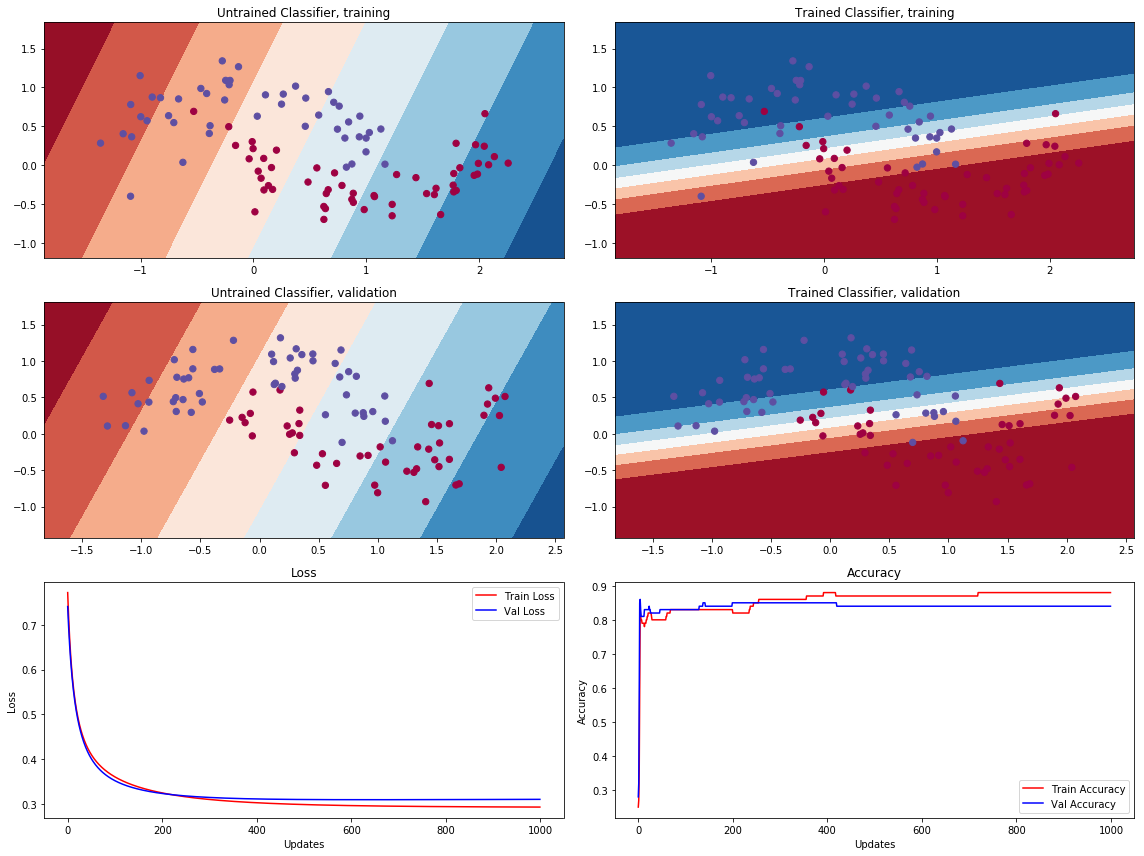

Done


In [253]:
num_epochs = 1000

# restricting memory usage, TensorFlow is greedy and will use all memory otherwise
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)

train_cost, val_cost, train_acc, val_acc = [],[],[],[]
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:
    try:
        print('Begin training')
        # initializing all variables 
        init = tf.global_variables_initializer()
        sess.run(init)

        ## Plotting
        fig = plt.figure(figsize=(16,12))
        fig.add_subplot(321)
        plt.title("Untrained Classifier, training")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_tr, y_tr)
        fig.add_subplot(323)
        plt.title("Untrained Classifier, validation")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_val, y_val)

        for e in range(num_epochs):
            ### TRAINING ###
            # what to feed to our train_op
            # notice we onehot encode our predictions to change shape from (batch,) -> (batch, num_output)
            feed_dict_train = {x_pl: X_tr, y_: utils.onehot(y_tr, num_output)}

            # deciding which parts to fetch, train_op makes the classifier "train"
            fetches_train = [train_op, cross_entropy, accuracy]

            # running the train_op
            res = sess.run(fetches=fetches_train, feed_dict=feed_dict_train)
            # storing cross entropy (second fetch argument, so index=1)
            train_cost += [res[1]]
            train_acc += [res[2]]

            ### VALIDATING ###
            # what to feed our accuracy op
            feed_dict_valid = {x_pl: X_val, y_: utils.onehot(y_val, num_output)}

            # deciding which parts to fetch
            fetches_valid = [cross_entropy, accuracy]

            # running the validation
            res = sess.run(fetches=fetches_valid, feed_dict=feed_dict_valid)
            val_cost += [res[0]]
            val_acc += [res[1]]


            if e % 100 == 0:
                print("Epoch %i, Train Cost: %0.3f\tVal Cost: %0.3f\t Val acc: %0.3f" \
                      %(e, train_cost[-1],val_cost[-1],val_acc[-1]))

        ## Plotting
        fig.add_subplot(322)
        plt.title("Trained Classifier, training")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_tr, y_tr)
        fig.add_subplot(324)
        plt.title("Trained Classifier, validation")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_val, y_val)

        epoch = np.arange(len(train_cost))
        fig.add_subplot(325)
        plt.title('Loss')
        plt.plot(epoch, train_cost,'r', label='Train Loss')
        plt.plot(epoch, val_cost,'b', label='Val Loss')
        plt.legend()
        plt.xlabel('Updates'), plt.ylabel('Loss')

        fig.add_subplot(326)
        plt.title('Accuracy')
        plt.plot(epoch, train_acc,'r', label='Train Accuracy')
        plt.plot(epoch, val_acc,'b', label='Val Accuracy')
        plt.legend(loc=4)
        plt.xlabel('Updates'), plt.ylabel('Accuracy')

        plt.tight_layout()
        plt.show()
    except KeyboardInterrupt:
        print('KeyboardInterrupt')

print('Done')

You have now seen how to use TensorFlow to setup and train a logistic regression classifier.
Now you will have to extend the code into a neural network.


# <span style="color:red"> Exercise 1: From logistic regression to 'deep learning'</span>

#### <span style="color:red"> EXE 1.1) Add a hidden layer. 
</span>
A linear logistic classifier is only able to create a linear decision boundary. 
Make the model into a nonlinear neural network by inserting a dense hidden layer between the input and output layers of the model.

The fully connected architecture we are trying to define can be visualized in the following manner: 

<img src="images/ffn.png" style="width: 500px;"/> 

Each hidden unit $h_i$ in each layer is connected to all the units in the former layer.
The weights of a layer can therefore be defined as a matrix $M$ with one row for every hidden unit in the former layer and one column for every unit in the current layer.
We also want to add a bias vector $b_i$ to each hidden unit $h_i$ (i.e. same number of elements as there are columns in the matrix).
Mathematically this equals the function: 

$$ Y = X * H + b $$

So in forward propagation we multiply each layer-matrix with its input and add a bias vector.
We then apply an activation function to the result and pass the output of this activation function as the input to the next layer.

1. **Modify the code in 'Creating the graph' by following the instructions in the comments.**


## Model 2

In [341]:
tf.reset_default_graph()

x_pl = tf.placeholder(tf.float32, [None, num_features], name='xPlaceholder')
weight_initializer = tf.truncated_normal_initializer(stddev=0.1)

In [342]:
n_hidden1 = 100
n_hidden2 = 100

with tf.variable_scope('m2'): 

    ### Create layer 1
    with tf.variable_scope('layer1'): 

        W_1 = tf.get_variable('W_1', [num_features, n_hidden1], 
                              initializer=weight_initializer)
        b_1 = tf.get_variable('b_1', [n_hidden1],
                              initializer=tf.constant_initializer(0.0))

        with tf.variable_scope('output1'):

            l_1 = tf.matmul(x_pl, W_1) + b_1
            l_1 = tf.nn.relu(l_1)

    ### Create layer 2
    with tf.variable_scope('layer2'): 

        W_2 = tf.get_variable('W_2', [n_hidden1, n_hidden2],
                              initializer=weight_initializer)
        b_2 = tf.get_variable('b_2', [n_hidden2], 
                              initializer=tf.constant_initializer(0.0))

        with tf.variable_scope('output2'):

            l_2 = tf.matmul(l_1, W_2) + b_2
            l_2 = tf.nn.relu(l_2)

    ### Create layer 3
    with tf.variable_scope('layer3'): 

        W_3 = tf.get_variable('W_3', [n_hidden2, num_output],
                              initializer=weight_initializer)
        b_3 = tf.get_variable('b_3', [num_output], 
                              initializer=tf.constant_initializer(0.0))

        with tf.variable_scope('output3'):

            l_3 = tf.matmul(l_2, W_3) + b_3        

y = tf.nn.softmax(l_3) # <-- CHANGE!

In [343]:

y_ = tf.placeholder(tf.float32, [None, num_output], name='yPlaceholder')

with tf.variable_scope('loss'):
    # computing cross entropy per sample
    cross_entropy = -tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])

    # Average over samples
    # Averaging makes the loss invariant to batch size, which is very nice.
    cross_entropy = tf.reduce_mean(cross_entropy)

with tf.variable_scope('trainOP'):
    # Defining our optimizer
    optimizer = tf.train.AdamOptimizer(1e-4)

    # Computing our gradients
    grads_and_vars = optimizer.compute_gradients(cross_entropy)

    # Applying the gradients
    train_op = optimizer.apply_gradients(grads_and_vars)    

with tf.variable_scope('performance'):
    # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
    correct_prediction = tf.equal(tf.argmax(y, axis=1), tf.argmax(y_, axis=1))

    # averaging the one-hot encoded vector
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [344]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    tmp_def = utils.rename_nodes(sess.graph_def, lambda s:"/".join(s.split('_',1)))
    utils.show_graph(tmp_def)

Begin training
Epoch 0, Train Cost: 0.695	Val Cost: 0.697	 Val acc: 0.460
Epoch 100, Train Cost: 0.588	Val Cost: 0.591	 Val acc: 0.800
Epoch 200, Train Cost: 0.466	Val Cost: 0.466	 Val acc: 0.820
Epoch 300, Train Cost: 0.371	Val Cost: 0.375	 Val acc: 0.830
Epoch 400, Train Cost: 0.314	Val Cost: 0.334	 Val acc: 0.850
Epoch 500, Train Cost: 0.284	Val Cost: 0.320	 Val acc: 0.870
Epoch 600, Train Cost: 0.265	Val Cost: 0.314	 Val acc: 0.850
Epoch 700, Train Cost: 0.252	Val Cost: 0.309	 Val acc: 0.850
Epoch 800, Train Cost: 0.239	Val Cost: 0.303	 Val acc: 0.850
Epoch 900, Train Cost: 0.227	Val Cost: 0.294	 Val acc: 0.870


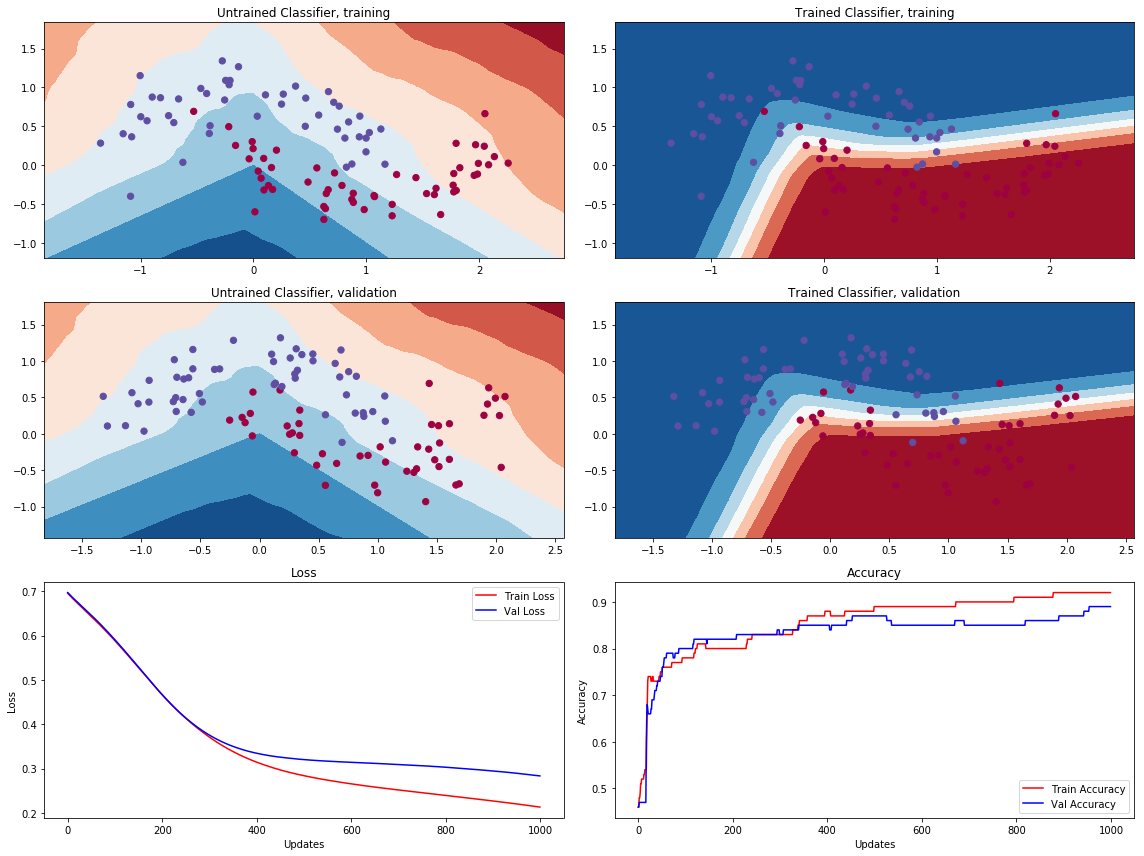

Done


In [345]:
num_epochs = 1000

# restricting memory usage, TensorFlow is greedy and will use all memory otherwise
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)

train_cost, val_cost, train_acc, val_acc = [],[],[],[]
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:
    try:
        print('Begin training')
        # initializing all variables 
        init = tf.global_variables_initializer()
        sess.run(init)

        ## Plotting
        fig = plt.figure(figsize=(16,12))
        fig.add_subplot(321)
        plt.title("Untrained Classifier, training")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_tr, y_tr)
        fig.add_subplot(323)
        plt.title("Untrained Classifier, validation")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_val, y_val)

        for e in range(num_epochs):
            ### TRAINING ###
            # what to feed to our train_op
            # notice we onehot encode our predictions to change shape from (batch,) -> (batch, num_output)
            feed_dict_train = {x_pl: X_tr, y_: utils.onehot(y_tr, num_output)}

            # deciding which parts to fetch, train_op makes the classifier "train"
            fetches_train = [train_op, cross_entropy, accuracy]

            # running the train_op
            res = sess.run(fetches=fetches_train, feed_dict=feed_dict_train)
            # storing cross entropy (second fetch argument, so index=1)
            train_cost += [res[1]]
            train_acc += [res[2]]

            ### VALIDATING ###
            # what to feed our accuracy op
            feed_dict_valid = {x_pl: X_val, y_: utils.onehot(y_val, num_output)}

            # deciding which parts to fetch
            fetches_valid = [cross_entropy, accuracy]

            # running the validation
            res = sess.run(fetches=fetches_valid, feed_dict=feed_dict_valid)
            val_cost += [res[0]]
            val_acc += [res[1]]


            if e % 100 == 0:
                print("Epoch %i, Train Cost: %0.3f\tVal Cost: %0.3f\t Val acc: %0.3f" \
                      %(e, train_cost[-1],val_cost[-1],val_acc[-1]))

        ## Plotting
        fig.add_subplot(322)
        plt.title("Trained Classifier, training")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_tr, y_tr)
        fig.add_subplot(324)
        plt.title("Trained Classifier, validation")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_val, y_val)

        epoch = np.arange(len(train_cost))
        fig.add_subplot(325)
        plt.title('Loss')
        plt.plot(epoch, train_cost,'r', label='Train Loss')
        plt.plot(epoch, val_cost,'b', label='Val Loss')
        plt.legend()
        plt.xlabel('Updates'), plt.ylabel('Loss')

        fig.add_subplot(326)
        plt.title('Accuracy')
        plt.plot(epoch, train_acc,'r', label='Train Accuracy')
        plt.plot(epoch, val_acc,'b', label='Val Accuracy')
        plt.legend(loc=4)
        plt.xlabel('Updates'), plt.ylabel('Accuracy')

        plt.tight_layout()
        plt.show()
    except KeyboardInterrupt:
        print('KeyboardInterrupt')

print('Done')

## Model 3

In [346]:
tf.reset_default_graph()
x_pl = tf.placeholder(tf.float32, [None, num_features], name='xPlaceholder')
weight_initializer = tf.truncated_normal_initializer(stddev=0.1)

In [347]:
n_hidden1 = 100
n_hidden2 = 100
n_hidden3 = 100

with tf.variable_scope('m3'): 

    ### Create layer 1
    with tf.variable_scope('layer1'): 
        
        W_1 = tf.get_variable('W_1', [num_features, n_hidden1], 
                              initializer=weight_initializer)
        b_1 = tf.get_variable('b_1', [n_hidden1],
                              initializer=tf.constant_initializer(0.0))
        
        with tf.variable_scope('output1'):
            
            l_1 = tf.matmul(x_pl, W_1) + b_1
            l_1 = tf.nn.relu(l_1)

    ### Create layer 2
    with tf.variable_scope('layer2'): 
        
        W_2 = tf.get_variable('W_2', [n_hidden1, n_hidden2],
                              initializer=weight_initializer)
        b_2 = tf.get_variable('b_2', [n_hidden2], 
                              initializer=tf.constant_initializer(0.0))
        
        with tf.variable_scope('output2'):
            
            l_2 = tf.matmul(l_1, W_2) + b_2
            l_2 = tf.nn.relu(l_2)
            
    ### Create layer 3
    with tf.variable_scope('layer3'): 
        
        W_3 = tf.get_variable('W_3', [n_hidden2, n_hidden3],
                              initializer=weight_initializer)
        b_3 = tf.get_variable('b_3', [n_hidden3], 
                              initializer=tf.constant_initializer(0.0))
        
        with tf.variable_scope('output3'):
            
            l_3 = tf.matmul(l_2, W_3) + b_3
            l_3 = tf.nn.relu(l_3)            

    ### Create layer 4
    with tf.variable_scope('layer4'): 
        
        W_4 = tf.get_variable('W_4', [n_hidden2, num_output],
                              initializer=weight_initializer)
        b_4 = tf.get_variable('b_4', [num_output], 
                              initializer=tf.constant_initializer(0.0))
        
        with tf.variable_scope('output4'):
            
            l_4 = tf.matmul(l_3, W_4) + b_4        

y = tf.nn.softmax(l_4) # <-- CHANGE!

In [348]:
# y_ is a placeholder variable taking on the value of the target batch.
# This is used for computing the loss.
y_ = tf.placeholder(tf.float32, [None, num_output], name='yPlaceholder')

with tf.variable_scope('loss'):
    # computing cross entropy per sample
    cross_entropy = -tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])

    # Average over samples
    # Averaging makes the loss invariant to batch size, which is very nice.
    cross_entropy = tf.reduce_mean(cross_entropy)

with tf.variable_scope('trainOP'):
    # Defining our optimizer
    optimizer = tf.train.AdamOptimizer(1e-4)

    # Computing our gradients
    grads_and_vars = optimizer.compute_gradients(cross_entropy)

    # Applying the gradients
    train_op = optimizer.apply_gradients(grads_and_vars)    

with tf.variable_scope('performance'):
    # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
    correct_prediction = tf.equal(tf.argmax(y, axis=1), tf.argmax(y_, axis=1))

    # averaging the one-hot encoded vector
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [349]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    tmp_def = utils.rename_nodes(sess.graph_def, lambda s:"/".join(s.split('_',1)))
    utils.show_graph(tmp_def)

Begin training
Epoch 0, Train Cost: 0.698	Val Cost: 0.698	 Val acc: 0.230
Epoch 100, Train Cost: 0.569	Val Cost: 0.574	 Val acc: 0.840
Epoch 200, Train Cost: 0.347	Val Cost: 0.369	 Val acc: 0.840
Epoch 300, Train Cost: 0.272	Val Cost: 0.323	 Val acc: 0.850
Epoch 400, Train Cost: 0.235	Val Cost: 0.300	 Val acc: 0.870
Epoch 500, Train Cost: 0.197	Val Cost: 0.271	 Val acc: 0.900
Epoch 600, Train Cost: 0.153	Val Cost: 0.229	 Val acc: 0.930
Epoch 700, Train Cost: 0.112	Val Cost: 0.188	 Val acc: 0.930
Epoch 800, Train Cost: 0.082	Val Cost: 0.166	 Val acc: 0.940
Epoch 900, Train Cost: 0.063	Val Cost: 0.159	 Val acc: 0.940


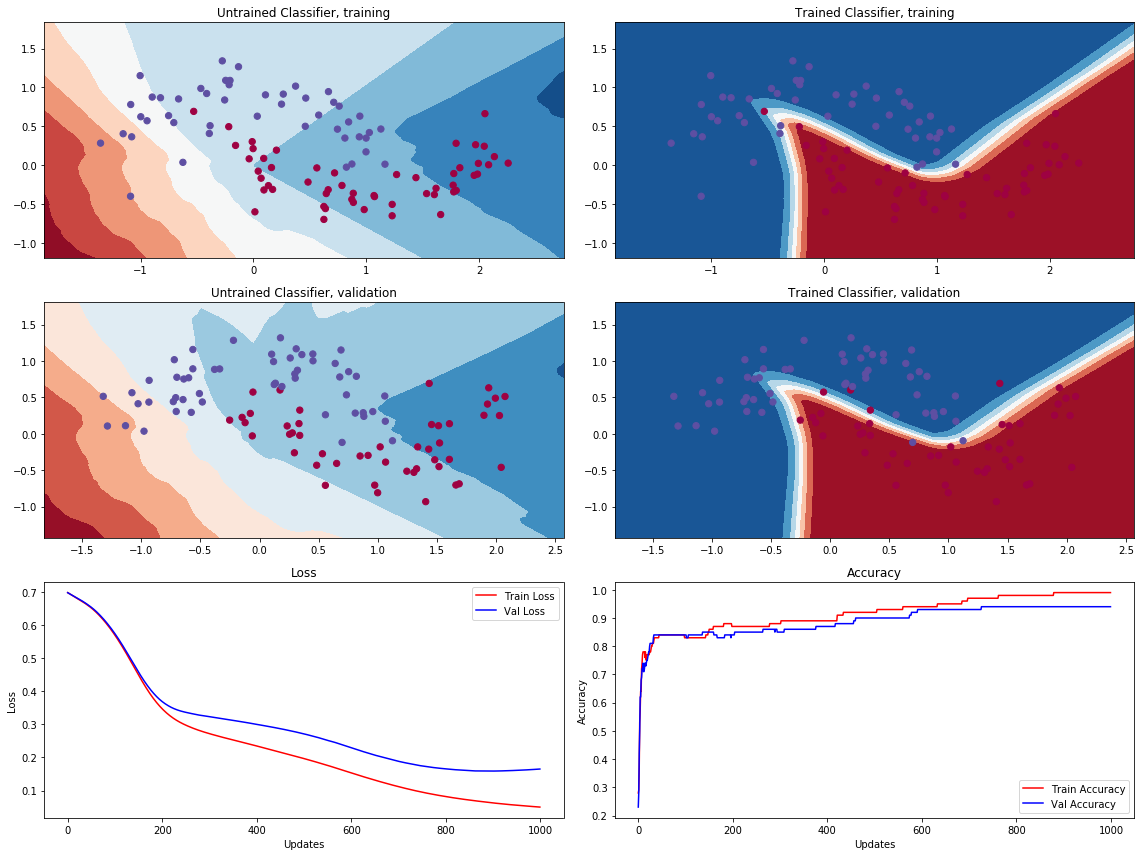

Done


In [350]:
num_epochs = 1000

# restricting memory usage, TensorFlow is greedy and will use all memory otherwise
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)

train_cost, val_cost, train_acc, val_acc = [],[],[],[]
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:
    try:
        print('Begin training')
        # initializing all variables 
        init = tf.global_variables_initializer()
        sess.run(init)

        ## Plotting
        fig = plt.figure(figsize=(16,12))
        fig.add_subplot(321)
        plt.title("Untrained Classifier, training")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_tr, y_tr)
        fig.add_subplot(323)
        plt.title("Untrained Classifier, validation")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_val, y_val)

        for e in range(num_epochs):
            ### TRAINING ###
            # what to feed to our train_op
            # notice we onehot encode our predictions to change shape from (batch,) -> (batch, num_output)
            feed_dict_train = {x_pl: X_tr, y_: utils.onehot(y_tr, num_output)}

            # deciding which parts to fetch, train_op makes the classifier "train"
            fetches_train = [train_op, cross_entropy, accuracy]

            # running the train_op
            res = sess.run(fetches=fetches_train, feed_dict=feed_dict_train)
            # storing cross entropy (second fetch argument, so index=1)
            train_cost += [res[1]]
            train_acc += [res[2]]

            ### VALIDATING ###
            # what to feed our accuracy op
            feed_dict_valid = {x_pl: X_val, y_: utils.onehot(y_val, num_output)}

            # deciding which parts to fetch
            fetches_valid = [cross_entropy, accuracy]

            # running the validation
            res = sess.run(fetches=fetches_valid, feed_dict=feed_dict_valid)
            val_cost += [res[0]]
            val_acc += [res[1]]


            if e % 100 == 0:
                print("Epoch %i, Train Cost: %0.3f\tVal Cost: %0.3f\t Val acc: %0.3f" \
                      %(e, train_cost[-1],val_cost[-1],val_acc[-1]))

        ## Plotting
        fig.add_subplot(322)
        plt.title("Trained Classifier, training")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_tr, y_tr)
        fig.add_subplot(324)
        plt.title("Trained Classifier, validation")
        utils.plot_decision_boundary(lambda x: pred(x, sess), X_val, y_val)

        epoch = np.arange(len(train_cost))
        fig.add_subplot(325)
        plt.title('Loss')
        plt.plot(epoch, train_cost,'r', label='Train Loss')
        plt.plot(epoch, val_cost,'b', label='Val Loss')
        plt.legend()
        plt.xlabel('Updates'), plt.ylabel('Loss')

        fig.add_subplot(326)
        plt.title('Accuracy')
        plt.plot(epoch, train_acc,'r', label='Train Accuracy')
        plt.plot(epoch, val_acc,'b', label='Val Accuracy')
        plt.legend(loc=4)
        plt.xlabel('Updates'), plt.ylabel('Accuracy')

        plt.tight_layout()
        plt.show()
    except KeyboardInterrupt:
        print('KeyboardInterrupt')

print('Done')

#### <span style="color:red"> EXE 1.2) Experiment with the number of hidden layers and number of units
 1. **What happens to the decision boundary?**
___
<span style="color:blue"> Answer: </span>


#### <span style="color:red"> EXE 1.3) Overfitting
When increasing the number of hidden layers / units the neural network will fit the training data better by creating a highly nonlinear decision boundary. If the model is to complex it will often generalize poorly to new data (validation and test set). 
  1. **How high can you get the training accuracy?**
  1. **Can you obseve this from the training and validation errors? **

___
<span style="color:blue"> Answer: </span>


#### <span style="color:red"> EXE 1.4) Changing optimizer
We used the vanilla stocastic gradient descent algorithm for parameter updates. This is usually slow to converge and more sophisticated pseudo-second-order methods usually works better. 
To use the other optimizers checkout which optimizers TensorFlow [supports](https://www.tensorflow.org/api_guides/python/train). 
In practice the ADAM algorithm (Kingma and Welling 2014 [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980v9)) or RMSProp are the most commonly used.

**Setting the learning rate**: The learning rate is a hyperparameter, which can be tricky to set. The following values often work, and are good initial guesses, but you should always try a couple of different learning rates, to see which is best.


1. SGD + Momentum: learning rate 1.0 - 0.1 
2. ADAM: learning rate: 1e-4 - 1e-5
3. RMSPROP: somewhere between SGD and ADAM   

Heres a small animation comparing different optimization algorithms under difficult circumstances.

Long Valley | Saddle Point
- | - 
<img src="http://i.imgur.com/2dKCQHh.gif?1" style="width: 400px;"/> | <img src="http://i.imgur.com/NKsFHJb.gif?1" style="width: 400px;"/>

Animations are from at http://imgur.com/a/Hqolp (which includes another example).

  1. **Try changing the optimizer to [ADAM](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer), and compare with SGD. **
  1. **Are there any differences in training time / performance?**
___
<span style="color:blue"> Answer: </span>


Using Adam, select a smaller learning rate.